# <center> Algorithmic Economics </center>
## <center> Assignment 4: Basics in Supervised Machine Learning </center>
### <center> Due date: April 08, 9:00am EDT, 2024 </center>

This assignment is created to help you get some basic ideas and working experience with supervised machine learning, by implementing a logistic regression classifier from scratch and comparing it with an SVM classifier on UCI mushroom dataset. We have prepared this Jupyter notebook for you to complete the key steps in the algorithm’s implementation. And in order to complete this homework, please also download the [UCI mushroom dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom).

### <center>Download and Process Dataset</center>

In [2]:
# Download the dataset, it is a zip file named 'mushroom.zip'
# Create a directory named 'mushroom' and extract the contents of mushroom.zip file into that directory

In [3]:
!mkdir mushroom && unzip mushroom.zip -d mushroom

unzip:  cannot find or open mushroom.zip, mushroom.zip.zip or mushroom.zip.ZIP.


In [4]:
import pandas as pd

mushroom_data_column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',	'gill-size', 'gill-color', \
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', \
    'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color',	'population', 'habitat'
]
mushroom_df = pd.read_csv('agaricus-lepiota.data', names=mushroom_data_column_names)
mushroom_df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [5]:
# Dataset contains categorical features.
# Get one-hot encoding for the categorical features/classes

mushroom_binary = pd.get_dummies(mushroom_df, drop_first=True, dtype=int)
mushroom_binary.head(3)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


### <center>Logistic Regression</center>
One of the most popularly used classifiers in real-world systems is [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), which can be easily implemented via gradient descent. Let’s first define some basic notations to mathematically describe a logistic regression classifier.

__Basics:__ Denote $x_i \in \mathbb{R}^d$ as the feature vector for instance $i$, whose label is $y_i \in \{0, 1\}$. Logistic regression assigns the probability that instance $i$ is in the positive class by:

\begin{align}
 p(y_i = 1 | x_i, \theta) = \frac{1}{1 + exp(-\theta^Tx_i)} \tag{1}
\end{align}

where $\theta \in \mathbb{R}^d$ is the parameter for the logistic regression model. Accordingly, $p(y_i=0 | x_i, \theta) = 1 - p(y_i=1 | x_i, \theta)$.

For a given set of labeled instances, $D = \{(x_i, y_i)\}^n_{i=1}$, we obtain the optimal parameter $\theta$ by minimizing the model's negative log-likelihood loss on $D$:

\begin{align}
\mathcal{L}(\theta) = -\frac{1}{n}\sum_{i=1}^n \log p\left(y_i | x_i, \theta\right) + \frac{\lambda}{2}\theta^T\theta \tag{2}
\end{align}

where $\lambda$ is a pre-selected coefficient to control the model complexity, i.e., [L2 regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)).

### Q1 Implement binary logistic regression (30 pts)
The first step is to mathematically derive the gradient of $\mathcal{L}$ with respect to $\theta$. Please carefully write down your derivations and results in your report (<u>10 pts</u>). Then, please translate your derivation into this Jupyter notebook (<u>20 pts</u>).

__Solution__:

Given the negative log-likelihood loss function for logistic regression:

\begin{align}
\mathcal{L}(\theta) = -\frac{1}{n}\sum_{i=1}^n \log p\left(y_i | x_i, \theta\right) + \frac{\lambda}{2}\theta^T\theta \tag{2}
\end{align}

$$ \mathcal{L}(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p(y_i=1|x_i,\theta)) + (1 - y_i) \log(1 - p(y_i=1|x_i,\theta)) \right] + \frac{\lambda}{2} \theta^T \theta $$


First, compute the gradient of the log-likelihood term:

$$ \frac{\partial}{\partial \theta} \left[ y_i \log(p(y_i=1|x_i,\theta)) + (1 - y_i) \log(1 - p(y_i=1|x_i,\theta)) \right] $$

$$ \frac{\partial}{\partial \theta} \left[ y_i \log(\frac{1}{1 + exp(-\theta^Tx_i)}) + (1 - y_i) \log(\frac{exp(-\theta^Tx_i)}{1 + exp(-\theta^Tx_i)} \tag{1}) \right] $$

$$ = y_i \frac{\exp(-\theta^T x_i)}{1 + \exp(-\theta^T x_i)} x_i - (1 - y_i) \frac{1}{1 + \exp(-\theta^T x_i)} x_i $$

$$
= \left( y_i \cdot \frac{\exp(-\theta^T x_i)}{1 + \exp(-\theta^T x_i)} - (1 - y_i) \cdot \frac{1}{1 + \exp(-\theta^T x_i)} \right) \cdot x_i
$$

$$
= \left( y_i \cdot (1 - \frac{1}{1 + \exp(-\theta^T x_i)}) - (1 - y_i) \cdot \frac{1}{1 + \exp(-\theta^T x_i)} \right) \cdot x_i
$$

$$
= \left( y_i - y_i \cdot \frac{1}{1 + \exp(-\theta^T x_i)} - \frac{1}{1 + \exp(-\theta^T x_i)} + y_i \cdot \frac{1}{1 + \exp(-\theta^T x_i)} \right) \cdot x_i
$$

$$ = \left( y_i - \frac{1}{1 + \exp(-\theta^T x_i)} \right) x_i $$

$$ = \left( y_i - p(y_i=1|x_i,\theta) \right) x_i $$

Gradient of the regularization term:

$$ \frac{\partial}{\partial \theta} \left( \frac{\lambda}{2} \theta^T \theta \right) = \lambda \theta $$

Combining both terms, the gradient of the loss function is:

$$ \nabla_{\theta} L(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left( y_i - p(y_i=1|x_i,\theta) \right) x_i + \lambda \theta $$


In [6]:
import numpy as np

def logistic_probablity_func(theta): # Basically, sigmoid function
    return 1 / (1 + np.exp(-theta))

"""
    Compute the gradient of the loss function, given:
    X: Input features for all examples (a matrix).
    y: Actual labels for all examples (a vector).
    theta: The parameter vector for logistic regression (a vector).
    lambda_: The regularization parameter.
"""
def compute_gradient(X, y, theta, lambda_):
    n = len(y) # number of examples
    prediction_prob = logistic_probablity_func(X.dot(theta)) # predictions for all examples
    errors = y - prediction_prob # difference between actual and predicted
    gradient = -(1/n) * X.T.dot(errors) + lambda_ * theta # gradient as shown in derivation above
    return gradient

### Q2 Fine tune your logistic regression classifier (35 pts)
We have prepared the UCI mushroom dataset for you to study your logistic regression classifier. We already implemented 5-fold cross-validation and standard classification metric, Precision, for you. First, please implement Recall and F1-score according to [this Wikipedia article](https://en.wikipedia.org/wiki/Precision_and_recall)(<u>10 pts</u>). Second, please fine-tune the L2 coefficient $\lambda$ in $[0.01, 10]$ and the learning rate $\eta$, which can be found in this notebook, in $[0.001, 0.5]$ (you can choose your step sizes for these two hyper-parameters). Plot your obtained Precision, Recall and F1-score from cross validation against $\lambda$ and $\eta$ accordingly and include the figures in your report (<u>25 pts</u>).

### <center>Get Structured Data</center>

In [7]:
mushroom_X = mushroom_binary.drop('class_p', axis=1)
mushroom_X['bias'] = 1
X = mushroom_X.values.astype(int)
mushroom_Y = mushroom_binary['class_p']
Y = mushroom_Y.values.astype(int)

# data preview
print('feature shape:', X.shape)
print('label shape:', Y.shape)

feature shape: (8124, 96)
label shape: (8124,)


### <center>Implement Logistic Regression</center>

In [8]:
import numpy as np
from tqdm import tqdm

# Set random seed
np.random.seed(10)


def sigmoid(z):
    return 1. / (1 + np.exp(-z))


def z(theta, x):
    return np.dot(x, theta)


def p(theta, x):
    return sigmoid(z(theta, x))


def loss(theta, x, y, lbd):
    """The loss function of logistic regression
        Args:
            theta:     the model parameter, size (d, )
            x    :     data features, size (n, d)
            y    :     data labels  , size (n, )
            lbd  :     the L2 regularization coefficient, scalar
        Return:
            L    :     the loss value, scalar
    """
    # compute and return the loss for the given parameters
    # INSERT CODE HERE

    n = len(y)
    probabilities = p(theta, x)
    log_likelihood = y * np.log(probabilities) - (1 - y) * np.log(1 - probabilities)
    negative_loss = -1 * np.sum(log_likelihood) / n + (lbd / 2) * np.dot(theta.T,theta)
    return negative_loss


def compute_gradient(theta, x, y, lbd):
    """Compute the gradient of the loss function of logistic regression
        Args:
            theta:     the model parameter, size (d, )
            x    :     data features, size (n, d)
            y    :     data labels  , size (n, )
            lbd  :     the L2 regularization coefficient, scalar
        Return:
            g    :     the gradient, size (d, )
    """
    # compute and return the gradient for the given parameters
    # INSERT CODE HERE

    n = len(y) # number of examples
    prediction_prob = p(theta,x) # predictions for all examples
    errors = y - prediction_prob # difference between actual and predicted
    gradient = -(1/n) * x.T.dot(errors) + lbd * theta # gradient as shown in derivation above
    return gradient


def optimize(theta, x, y, iterations=100, learning_rate=0.1, lbd = 0.1):
    """
        Optimize the model by taking gradient descent updates
    """
    Losses = []
    for _ in tqdm(range(iterations)):
        grad = compute_gradient(theta=theta, x=x, y=y, lbd=lbd)
        theta -= learning_rate * grad
        Losses.append(loss(theta=theta, x=x, y=y, lbd=lbd))
    return theta, Losses


def train_model(train_data, train_label, num_iter=100, learning_rate=0.1, lbd=0.1):
    """
        Specify the initial parameter and train model
    """
    init_theta = np.random.randn(train_data.shape[1])
    theta, Losses = optimize(
        theta=init_theta,
        x=train_data,
        y=train_label,
        iterations=num_iter,
        learning_rate=learning_rate,
        lbd=lbd
    )
    return theta, Losses

### <center>Implement evaluation metrics</center>

In [9]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))

    precision = tp / (tp + fp)

    return precision

def recall(y_true, y_pred):
    # compute recall
    # INSERT CODE HERE
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0)) # false negative

    recall = tp / (tp + fn)

    return recall

def f1_score(y_true, y_pred):
    # compute F1 score
    # INSERT CODE HERE
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_score = (2 * prec * rec) / (prec+ rec)

    return f1_score

def evaluate_model(model, test_data, test_labels, decision_threshold=0.0, metric='precision'):
    predictions = test_data.dot(model) > decision_threshold
    y_true = test_labels
    if metric == 'precision':
        return precision(y_true, predictions)
    elif metric == 'recall':
        return recall(y_true, predictions)
    elif metric == 'f1-score':
        return f1_score(y_true, predictions)
    else:
        raise ValueError("Undefined evaluation metric.")

### <center>Train Model</center>
#### Run Training

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def cross_validation(train_data, num_folds=5, num_iter=200, eta=0.1, lbd=0.1, metrics=['precision']):
    """Perform cross validation
        Args:
            train_data: training data (X, Y)
            num_folds:  number of folds used in cross-validation
            num_iter:   numer of iterations used in gradient descent
            eta:        learning rate, in [0.001, 0.5]
            lbd:        L2-regulariation coefficient, in [0.01, 10]
            metric:     precision/recall/f1-score
        Return:
            Losses:     the training loss at each time step
            avg_score:  the average value of the specified metric
    """

    # Shuffle the data and labels
    X, Y = train_data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]

    # Perform 5-fold cross-validation
    fold_size = len(X) // num_folds

    scores = np.zeros((num_folds, len(metrics)))

    print('Executing ' + str(num_folds) + '-fold cross validation......')
    for fold in range(num_folds):
        print('fold-', fold)
        # Split the data into train and test sets
        test_indices = indices[fold * fold_size: (fold + 1) * fold_size]
        train_indices = np.concatenate([indices[: fold * fold_size], indices[(fold + 1) * fold_size:]])

        train_data, train_labels = X[train_indices], Y[train_indices]
        test_data, test_labels = X[test_indices], Y[test_indices]

        # Train the model
        theta, Losses = train_model(train_data, train_labels, num_iter=num_iter, learning_rate=eta, lbd=lbd)

        # Evaluate the model
        for i in range(len(metrics)):
            metric = metrics[i]
            score = evaluate_model(model=theta, test_data=test_data, test_labels=test_labels, metric=metric)
            scores[fold, i] = score
    res = np.mean(scores, axis=0)
    print('\nTraining completed! The average ' + ','.join(metrics) + ' is: ', res)
    return Losses, res

Losses, res = cross_validation(train_data=(X, Y), num_folds=5, num_iter=300, eta=0.1, lbd=0.1, metrics=['precision', 'recall', 'f1-score'])

Executing 5-fold cross validation......
fold- 0


100%|██████████| 300/300 [00:00<00:00, 416.84it/s]


fold- 1


100%|██████████| 300/300 [00:00<00:00, 428.99it/s]


fold- 2


100%|██████████| 300/300 [00:00<00:00, 429.04it/s]


fold- 3


100%|██████████| 300/300 [00:00<00:00, 420.23it/s]


fold- 4


100%|██████████| 300/300 [00:00<00:00, 442.72it/s]


Training completed! The average precision,recall,f1-score is:  [0.98329394 0.90106755 0.94037209]


#### Evaluate Metrics

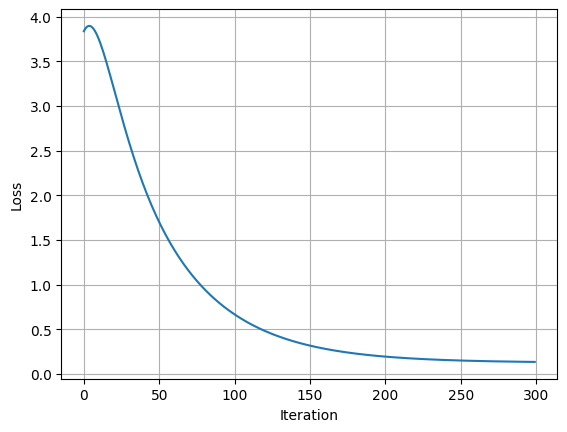

Final Loss: 0.13292005220257386


In [11]:
# Plot the training loss curve
plt.plot(range(len(Losses)), Losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()
print('Final Loss:', Losses[-1])

### <center>Fine-tune hyper-parameters</center>
#### Fine-tune $\eta$

Learning rate : 0.001
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 313.94it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 441.30it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 438.45it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 444.79it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 337.17it/s]



Training completed! The average precision,recall,f1-score is:  [0.48356679 0.42050903 0.44012622]
Learning rate : 0.01820689655172414
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 408.53it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 440.47it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 452.17it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 446.85it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 316.57it/s]



Training completed! The average precision,recall,f1-score is:  [0.97909835 0.88717563 0.93083902]
Learning rate : 0.03541379310344828
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 442.51it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 454.47it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 451.73it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 451.35it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 330.58it/s]



Training completed! The average precision,recall,f1-score is:  [0.98218679 0.89631624 0.93726475]
Learning rate : 0.052620689655172415
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 452.57it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 447.69it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 450.95it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 441.17it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 316.04it/s]



Training completed! The average precision,recall,f1-score is:  [0.98351753 0.89772077 0.93864388]
Learning rate : 0.06982758620689655
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 442.37it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 459.92it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 444.94it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 364.55it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 385.95it/s]



Training completed! The average precision,recall,f1-score is:  [0.98318464 0.89716437 0.93816546]
Learning rate : 0.08703448275862069
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 428.79it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 442.91it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 368.77it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 322.29it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 427.34it/s]



Training completed! The average precision,recall,f1-score is:  [0.98320835 0.89656874 0.93786822]
Learning rate : 0.10424137931034483
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 430.95it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 450.73it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 400.70it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 354.68it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 436.43it/s]



Training completed! The average precision,recall,f1-score is:  [0.98377346 0.89832667 0.93907081]
Learning rate : 0.12144827586206897
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 443.78it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 449.41it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 312.58it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 441.72it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 455.59it/s]



Training completed! The average precision,recall,f1-score is:  [0.98316513 0.89654085 0.93780438]
Learning rate : 0.1386551724137931
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 441.99it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 437.37it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 314.16it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 445.40it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 444.62it/s]



Training completed! The average precision,recall,f1-score is:  [0.98319095 0.89606661 0.93753147]
Learning rate : 0.15586206896551724
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 446.12it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 446.59it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 317.03it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 451.74it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 443.72it/s]



Training completed! The average precision,recall,f1-score is:  [0.98377052 0.89701018 0.93838552]
Learning rate : 0.17306896551724138
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 439.22it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 359.45it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 376.81it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 441.76it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 449.48it/s]



Training completed! The average precision,recall,f1-score is:  [0.98370102 0.89745409 0.93856996]
Learning rate : 0.19027586206896552
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 442.54it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 302.14it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 449.49it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 448.60it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 454.52it/s]



Training completed! The average precision,recall,f1-score is:  [0.98350655 0.89574044 0.93751503]
Learning rate : 0.20748275862068966
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 454.42it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 313.43it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 443.90it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 446.93it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 451.73it/s]



Training completed! The average precision,recall,f1-score is:  [0.98350971 0.89911348 0.93933483]
Learning rate : 0.2246896551724138
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 443.87it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 308.88it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 446.16it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 443.60it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 440.95it/s]



Training completed! The average precision,recall,f1-score is:  [0.98377599 0.89630979 0.93794058]
Learning rate : 0.24189655172413793
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 284.95it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 450.44it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 445.30it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 460.35it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 437.94it/s]



Training completed! The average precision,recall,f1-score is:  [0.98349531 0.89610189 0.93768132]
Learning rate : 0.25910344827586207
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 324.96it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 439.70it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 450.90it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 455.88it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 449.66it/s]



Training completed! The average precision,recall,f1-score is:  [0.98351571 0.89789427 0.93867593]
Learning rate : 0.2763103448275862
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 319.29it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 446.82it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 448.87it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 447.04it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 406.04it/s]



Training completed! The average precision,recall,f1-score is:  [0.98310899 0.89594002 0.93743029]
Learning rate : 0.29351724137931035
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 346.14it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 444.74it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 437.70it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 438.55it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 313.22it/s]



Training completed! The average precision,recall,f1-score is:  [0.9834833  0.89602205 0.93770639]
Learning rate : 0.3107241379310345
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 446.80it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 446.72it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 445.81it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 444.58it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 312.88it/s]



Training completed! The average precision,recall,f1-score is:  [0.98312771 0.89650804 0.9378126 ]
Learning rate : 0.3279310344827586
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 446.31it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 445.57it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 446.58it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 445.54it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 318.21it/s]



Training completed! The average precision,recall,f1-score is:  [0.98319428 0.89596528 0.93749402]
Learning rate : 0.34513793103448276
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 440.09it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 451.76it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 442.95it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 376.42it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 363.17it/s]



Training completed! The average precision,recall,f1-score is:  [0.98328783 0.89661633 0.93794293]
Learning rate : 0.3623448275862069
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 449.11it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 432.09it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 439.57it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 309.03it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 439.37it/s]



Training completed! The average precision,recall,f1-score is:  [0.98308659 0.89642035 0.93772597]
Learning rate : 0.37955172413793103
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 443.87it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 441.09it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 439.86it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 301.03it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 436.05it/s]



Training completed! The average precision,recall,f1-score is:  [0.98319463 0.89831851 0.93883737]
Learning rate : 0.3967586206896552
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 448.13it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 446.74it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 375.14it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 381.33it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 437.74it/s]



Training completed! The average precision,recall,f1-score is:  [0.9835196  0.89681794 0.93807015]
Learning rate : 0.4139655172413793
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 451.78it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 444.10it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 316.82it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 441.10it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 451.85it/s]



Training completed! The average precision,recall,f1-score is:  [0.98404158 0.8972877  0.93862758]
Learning rate : 0.43117241379310345
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 450.59it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 447.76it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 335.02it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 449.54it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 448.07it/s]



Training completed! The average precision,recall,f1-score is:  [0.98323625 0.89656363 0.93785678]
Learning rate : 0.4483793103448276
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 449.67it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 446.35it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 324.46it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 450.47it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 444.61it/s]



Training completed! The average precision,recall,f1-score is:  [0.98350088 0.8973437  0.93841947]
Learning rate : 0.4655862068965517
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 440.51it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 360.15it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 374.10it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 438.37it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 442.56it/s]



Training completed! The average precision,recall,f1-score is:  [0.98317998 0.89771481 0.93847649]
Learning rate : 0.48279310344827586
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 449.14it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 323.60it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 453.08it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 439.98it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 447.10it/s]



Training completed! The average precision,recall,f1-score is:  [0.98322391 0.89598632 0.93754175]
Learning rate : 0.5
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 450.40it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 335.14it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 452.27it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 449.65it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 440.42it/s]



Training completed! The average precision,recall,f1-score is:  [0.98361012 0.89754829 0.93853158]


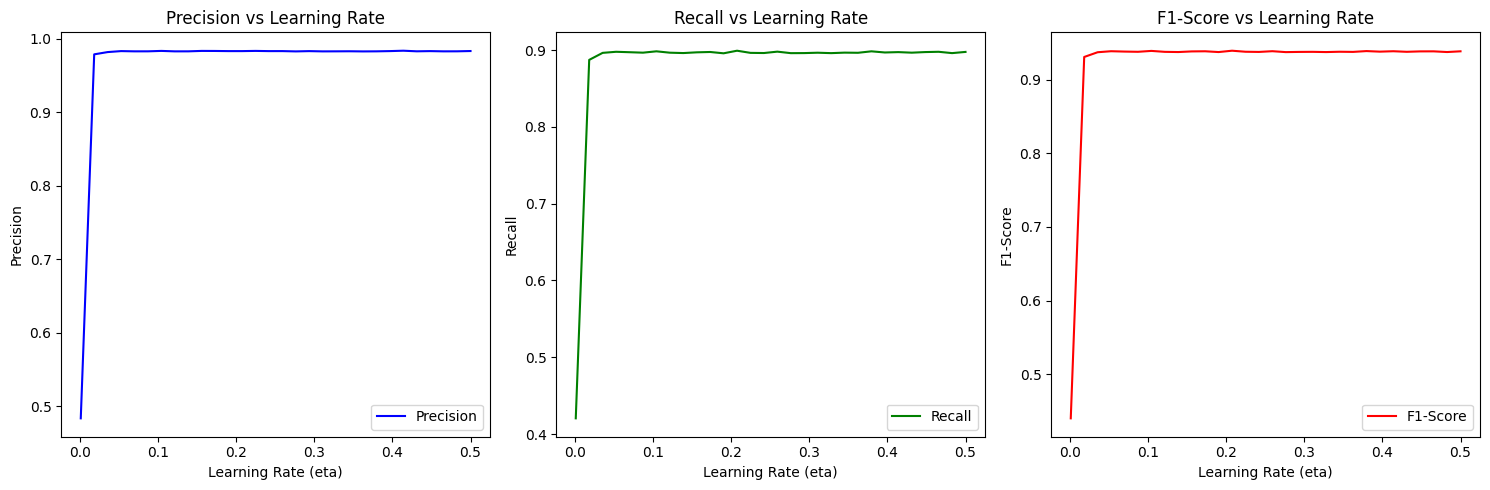

Max precision score: 0.9840415770575243
Max recall score: 0.8991134804975249
Max f1 score: 0.9393348322636461


In [12]:
# INSERT CODE HERE
eta_values = np.linspace(0.001, 0.5, 30) # generates 30 values between 0.001 and 0.5 Try different values in the range [0.001, 0.5] for the learning rate parameter 'eta'
metric_scores = {'precision': [], 'recall': [], "f1-score": []}
for eta in eta_values:
    print('Learning rate :', eta)
    _, scores = cross_validation(train_data=(X, Y), num_folds=5, num_iter=1000, eta=eta, lbd=0.1, metrics=['precision', 'recall', 'f1-score'])
    for i in range(len(metric_scores.keys())):#['precision', 'recall', 'f1-score']:
        metric_scores[list(metric_scores.keys())[i]].append(scores[i])

# INSERT CODE HERE
# Plot the 'precision', 'recall', 'f1-score' values for different choices of the learning parameter 'eta'
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(eta_values, metric_scores['precision'], label='Precision', color='blue')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('Precision')
plt.title('Precision vs Learning Rate')
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(eta_values, metric_scores['recall'], label='Recall', color='green')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('Recall')
plt.title('Recall vs Learning Rate')
plt.legend()

# F1-Score
plt.subplot(1, 3, 3)
plt.plot(eta_values, metric_scores['f1-score'], label='F1-Score', color='red')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()


print("Max precision score: " + str(max(metric_scores['precision'])))
print("Max recall score: " + str(max(metric_scores['recall'])))
print("Max f1 score: " + str(max(metric_scores['f1-score'])))


#### Fine-tune $\lambda$

Lambda: 0.01
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 348.31it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 370.43it/s]


fold- 2


100%|██████████| 1000/1000 [00:05<00:00, 186.81it/s]


fold- 3


100%|██████████| 1000/1000 [00:05<00:00, 173.78it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 383.05it/s]



Training completed! The average precision,recall,f1-score is:  [0.98266364 0.97413944 0.97837816]
Lambda: 0.3544827586206897
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 442.60it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 455.32it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 324.77it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 451.23it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 452.25it/s]



Training completed! The average precision,recall,f1-score is:  [0.9817701  0.82791128 0.89825341]
Lambda: 0.6989655172413793
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 433.27it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 458.44it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 328.71it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 462.92it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 453.97it/s]



Training completed! The average precision,recall,f1-score is:  [0.98388916 0.80980314 0.88836015]
Lambda: 1.0434482758620691
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 443.04it/s]


fold- 1


100%|██████████| 1000/1000 [00:04<00:00, 247.08it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 258.72it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 334.31it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 304.18it/s]



Training completed! The average precision,recall,f1-score is:  [0.98766765 0.80148783 0.88482238]
Lambda: 1.3879310344827587
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 257.99it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 317.15it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 370.72it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 272.21it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 369.09it/s]



Training completed! The average precision,recall,f1-score is:  [0.99329738 0.79884153 0.88550228]
Lambda: 1.7324137931034482
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 289.97it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 281.47it/s]


fold- 2


100%|██████████| 1000/1000 [00:04<00:00, 211.08it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 356.16it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 359.57it/s]



Training completed! The average precision,recall,f1-score is:  [0.99424208 0.79499595 0.88339765]
Lambda: 2.076896551724138
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 272.21it/s]


fold- 1


100%|██████████| 1000/1000 [00:04<00:00, 236.50it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 363.59it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 296.06it/s]


fold- 4


100%|██████████| 1000/1000 [00:04<00:00, 249.85it/s]



Training completed! The average precision,recall,f1-score is:  [0.99382827 0.79457865 0.88298875]
Lambda: 2.4213793103448276
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:04<00:00, 216.97it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 274.96it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 456.27it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 264.57it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 450.39it/s]



Training completed! The average precision,recall,f1-score is:  [0.99544577 0.79417082 0.88346255]
Lambda: 2.765862068965517
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 321.61it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 460.68it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 444.93it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 463.95it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 462.78it/s]



Training completed! The average precision,recall,f1-score is:  [0.99615044 0.79316865 0.88305229]
Lambda: 3.1103448275862067
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 328.31it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 456.85it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 438.31it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 462.96it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 401.84it/s]



Training completed! The average precision,recall,f1-score is:  [0.99611718 0.79207782 0.88241694]
Lambda: 3.4548275862068962
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 342.62it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 454.83it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 450.75it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 381.84it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 279.47it/s]



Training completed! The average precision,recall,f1-score is:  [0.99611406 0.79141222 0.88200273]
Lambda: 3.7993103448275862
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 357.59it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 324.39it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 376.65it/s]


fold- 3


100%|██████████| 1000/1000 [00:04<00:00, 226.28it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 312.90it/s]



Training completed! The average precision,recall,f1-score is:  [0.9971099  0.79050903 0.88181764]
Lambda: 4.143793103448276
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 328.92it/s]


fold- 1


100%|██████████| 1000/1000 [00:05<00:00, 187.83it/s]


fold- 2


100%|██████████| 1000/1000 [00:04<00:00, 240.43it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 292.77it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 269.64it/s]



Training completed! The average precision,recall,f1-score is:  [0.99741289 0.78944698 0.88124531]
Lambda: 4.488275862068965
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:04<00:00, 232.82it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 275.39it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 319.60it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 453.40it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 434.42it/s]



Training completed! The average precision,recall,f1-score is:  [0.99739506 0.78903538 0.88096685]
Lambda: 4.832758620689655
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 437.92it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 353.81it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 426.45it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 466.15it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 463.58it/s]



Training completed! The average precision,recall,f1-score is:  [0.99670968 0.78899052 0.88070796]
Lambda: 5.1772413793103444
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 452.02it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 333.60it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 444.29it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 454.46it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 456.45it/s]



Training completed! The average precision,recall,f1-score is:  [0.99675649 0.78811189 0.88014726]
Lambda: 5.5217241379310344
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 434.92it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 336.36it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 441.88it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 457.27it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 453.33it/s]



Training completed! The average precision,recall,f1-score is:  [0.99771663 0.78765097 0.88026887]
Lambda: 5.8662068965517244
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 436.93it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 335.64it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 441.31it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 463.49it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 452.33it/s]



Training completed! The average precision,recall,f1-score is:  [0.99705705 0.78635682 0.87917363]
Lambda: 6.210689655172414
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 388.79it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 366.50it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 443.51it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 460.23it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 446.43it/s]



Training completed! The average precision,recall,f1-score is:  [0.99740385 0.78653585 0.87941118]
Lambda: 6.555172413793104
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 318.34it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 455.65it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 446.59it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 461.52it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 452.20it/s]



Training completed! The average precision,recall,f1-score is:  [0.99805774 0.78607732 0.87936953]
Lambda: 6.899655172413793
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 268.90it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 446.22it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 432.85it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 457.04it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 415.01it/s]



Training completed! The average precision,recall,f1-score is:  [0.99869659 0.78567532 0.87939192]
Lambda: 7.244137931034483
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 333.48it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 449.42it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 443.09it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 453.58it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 311.38it/s]



Training completed! The average precision,recall,f1-score is:  [0.99803626 0.78304036 0.87744175]
Lambda: 7.588620689655173
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 417.64it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 323.47it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 250.11it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 286.81it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 314.82it/s]



Training completed! The average precision,recall,f1-score is:  [0.99800472 0.78364133 0.87781669]
Lambda: 7.933103448275862
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 359.05it/s]


fold- 1


100%|██████████| 1000/1000 [00:04<00:00, 223.36it/s]


fold- 2


100%|██████████| 1000/1000 [00:02<00:00, 382.35it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 287.11it/s]


fold- 4


100%|██████████| 1000/1000 [00:04<00:00, 203.33it/s]



Training completed! The average precision,recall,f1-score is:  [0.99866775 0.7840574  0.87836039]
Lambda: 8.277586206896553
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 264.35it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 363.94it/s]


fold- 2


100%|██████████| 1000/1000 [00:04<00:00, 214.53it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 310.60it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 457.08it/s]



Training completed! The average precision,recall,f1-score is:  [0.99868459 0.78200062 0.87710483]
Lambda: 8.622068965517242
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:02<00:00, 435.08it/s]


fold- 1


100%|██████████| 1000/1000 [00:02<00:00, 451.40it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 326.66it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 453.02it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 440.57it/s]



Training completed! The average precision,recall,f1-score is:  [0.99933441 0.78213808 0.87733929]
Lambda: 8.966551724137931
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 266.66it/s]


fold- 1


100%|██████████| 1000/1000 [00:04<00:00, 246.63it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 261.07it/s]


fold- 3


100%|██████████| 1000/1000 [00:04<00:00, 245.01it/s]


fold- 4


100%|██████████| 1000/1000 [00:03<00:00, 254.89it/s]



Training completed! The average precision,recall,f1-score is:  [0.99934531 0.78175859 0.87721569]
Lambda: 9.31103448275862
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:03<00:00, 323.81it/s]


fold- 1


100%|██████████| 1000/1000 [00:03<00:00, 310.71it/s]


fold- 2


100%|██████████| 1000/1000 [00:04<00:00, 231.18it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 302.46it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 371.31it/s]



Training completed! The average precision,recall,f1-score is:  [0.99933985 0.78207523 0.87743152]
Lambda: 9.655517241379311
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:04<00:00, 226.62it/s]


fold- 1


100%|██████████| 1000/1000 [00:04<00:00, 241.69it/s]


fold- 2


100%|██████████| 1000/1000 [00:04<00:00, 231.90it/s]


fold- 3


100%|██████████| 1000/1000 [00:03<00:00, 332.63it/s]


fold- 4


100%|██████████| 1000/1000 [00:04<00:00, 205.80it/s]



Training completed! The average precision,recall,f1-score is:  [0.99934833 0.78184827 0.8772794 ]
Lambda: 10.0
Executing 5-fold cross validation......
fold- 0


100%|██████████| 1000/1000 [00:04<00:00, 200.61it/s]


fold- 1


100%|██████████| 1000/1000 [00:05<00:00, 169.34it/s]


fold- 2


100%|██████████| 1000/1000 [00:03<00:00, 258.26it/s]


fold- 3


100%|██████████| 1000/1000 [00:02<00:00, 388.47it/s]


fold- 4


100%|██████████| 1000/1000 [00:02<00:00, 370.51it/s]



Training completed! The average precision,recall,f1-score is:  [0.99871025 0.78096279 0.8763693 ]


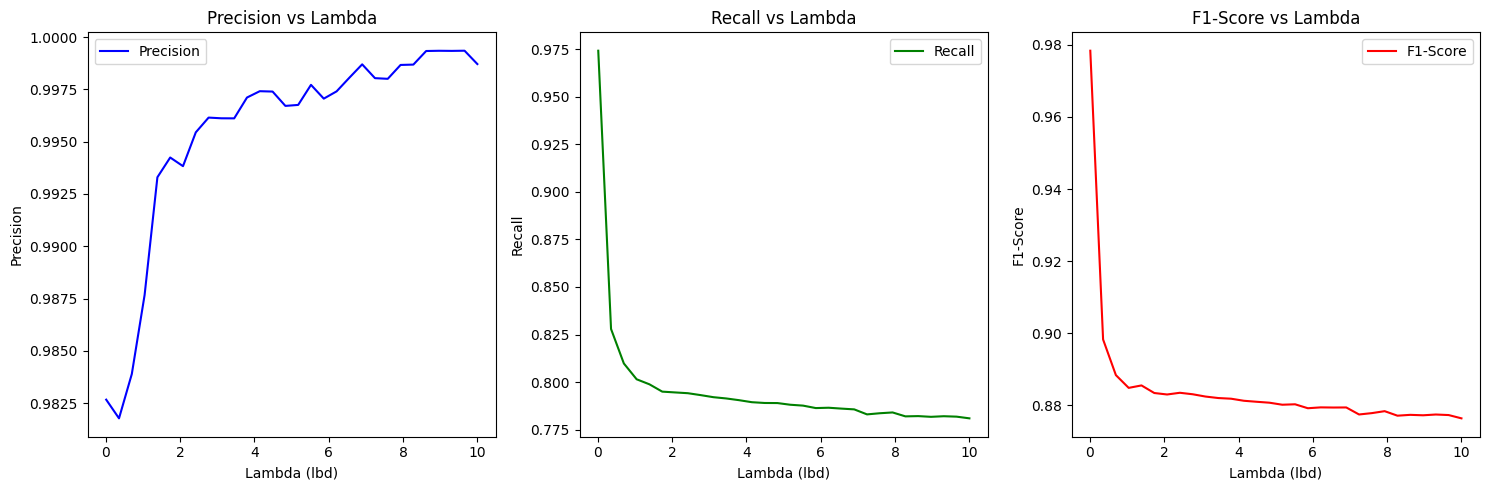

Max precision score: 0.9993483250414593
Max recall score: 0.974139436907226
Max f1 score: 0.978378160083951


In [13]:
# INSERT CODE HERE
lbd_values = np.linspace(0.01, 10, 30) # Try different values in the range [0.01, 10] for the parameter 'lambda'
metric_scores = metric_scores = {'precision': [], 'recall': [], "f1-score": []}
for lbd in lbd_values:
    print("Lambda:", lbd)
    _, scores = cross_validation(train_data=(X, Y), num_folds=5, num_iter=1000, eta=0.1, lbd=lbd, metrics=['precision', 'recall', 'f1-score'])
    for i in range(len(metric_scores.keys())):#['precision', 'recall', 'f1-score']:
        metric_scores[list(metric_scores.keys())[i]].append(scores[i])

#metric_scores = np.stack(metric_scores)

# INSERT CODE HERE
# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameter 'lambda'
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(lbd_values, metric_scores['precision'], label='Precision', color='blue')
plt.xlabel('Lambda (lbd)')
plt.ylabel('Precision')
plt.title('Precision vs Lambda')
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(lbd_values, metric_scores['recall'], label='Recall', color='green')
plt.xlabel('Lambda (lbd)')
plt.ylabel('Recall')
plt.title('Recall vs Lambda')
plt.legend()

# F1-Score
plt.subplot(1, 3, 3)
plt.plot(lbd_values, metric_scores['f1-score'], label='F1-Score', color='red')
plt.xlabel('Lambda (lbd)')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Lambda')
plt.legend()

plt.tight_layout()
plt.show()

print("Max precision score: " + str(max(metric_scores['precision'])))
print("Max recall score: " + str(max(metric_scores['recall'])))
print("Max f1 score: " + str(max(metric_scores['f1-score'])))

### Q3 Comparing against SVM (35 pts)
We included the implementation of Support Vector Machines [(SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) from sklearn in our Jupyter notebook, and now let’s compare these two most well-known classifiers. The most important hyper-parameters in an SVM classifier is $C$, whose role is the same as $\lambda$ for logistic regression, i.e., controlling model complexity. And to start with, we will choose linear kernel for SVM. First, please fine-tune $C$ to compare against the best cross-validation performance (i.e., Precision, Recall and F1) of logistic regression classifier you have obtained in __Q2__. Include the figure in your report (<u>15pts</u>). Now, you are free to fine-tune other hyper-parameters supported by [sklearn’s implementation of SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and see how much better you can outperform the logistic regression you implemented from scratch. Include the figure in your report (<u>20 pts</u>).

### SVM

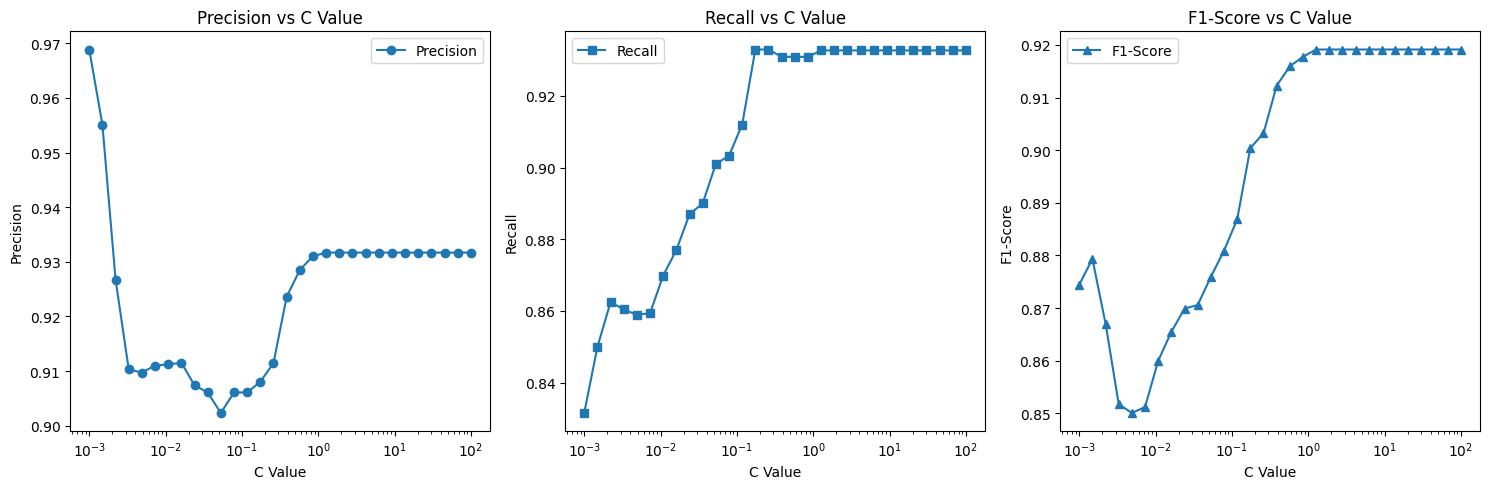

Max precision score: 0.9688486771395859
Max recall score: 0.9329058826595773
Max f1 score: 0.9191388750622199


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# INSERT CODE HERE
C_values = np.logspace(-3, 2, 30) # Try different values for the parameter 'C'
scoring_metrics = ['precision', 'recall', 'f1']
metric_scores = {'precision': [], 'recall': [], 'f1-score': []}

for C in C_values:
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # create an SVM classifier with a linear kernel
    svm = SVC(C=C, gamma='auto', kernel='linear')

    # fit the model to the training data
    # scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='precision')
    cv_results = cross_validate(svm, X, Y, cv=5, scoring=scoring_metrics, return_train_score=False)

    # Make predictions on the test data
    y_pred = svm.fit(X_train, y_train).predict(X_test)

    # Compute precision, recall, and F1-score using the classification_report function
    report = classification_report(y_test, y_pred, output_dict = True)

    # Collect precision, recall, f1-score
    # scores = np.array([float(c) for c in report.split('\n')[3].split()[1:4]])
    # metric_scores.append(scores)

    # Collect average scores across folds
    metric_scores['precision'].append(np.mean(cv_results['test_precision']))
    metric_scores['recall'].append(np.mean(cv_results['test_recall']))
    metric_scores['f1-score'].append(np.mean(cv_results['test_f1']))


# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameter 'C'
# INSERT CODE HERE

# Create three separate plots for precision, recall, and F1-score
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(C_values, metric_scores['precision'], label='Precision', marker='o')
plt.xlabel('C Value')
plt.ylabel('Precision')
plt.xscale('log')
plt.title('Precision vs C Value')
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(C_values, metric_scores['recall'], label='Recall', marker='s')
plt.xlabel('C Value')
plt.ylabel('Recall')
plt.xscale('log')
plt.title('Recall vs C Value')
plt.legend()

# F1-Score
plt.subplot(1, 3, 3)
plt.plot(C_values, metric_scores['f1-score'], label='F1-Score', marker='^')
plt.xlabel('C Value')
plt.ylabel('F1-Score')
plt.xscale('log')
plt.title('F1-Score vs C Value')
plt.legend()

plt.tight_layout()
plt.show()

print("Max precision score: " + str(max(metric_scores['precision'])))
print("Max recall score: " + str(max(metric_scores['recall'])))
print("Max f1 score: " + str(max(metric_scores['f1-score'])))

Once the lambda exceeded 7 for the logistic regressor, it yielded a precision score of around 0.999, which is greater than the precision scores achieved by the tuning of the lambda parameter and the C parameter of the SVM. Tuning the lambda parameter also achieved  the greatest recall and f1-scores of both approximately 0.97. However, these scores were achieved at different lambda values. The highest f1 and recall scores were yielded for lower lambda values (closer to 0), while the highest precision score was yielded for greater lambda values (closer to 10).

Tuning the learning rate parameter demonstrated a similar relationship across all scores. For precision, recall, and f-1, a learning rate of 0.05 or greater yielded the highest scores, but the highest recall achieved was 0.89.

Tuning the C-value of the SVM model showed that increasing the C-value corresponded to a decrease in precision but an increase in recall and f1-score. Although the SVM yielded high scores, it's relationship with the scores along with it's maximum score values does not suggest it is better than the tuned logistic regressor up to this point.

Overall, based on the tuning up to this point it seems that tuning the lambda parameter of the logistic regression model helps us best target our model with regards to maximizing a specific score.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

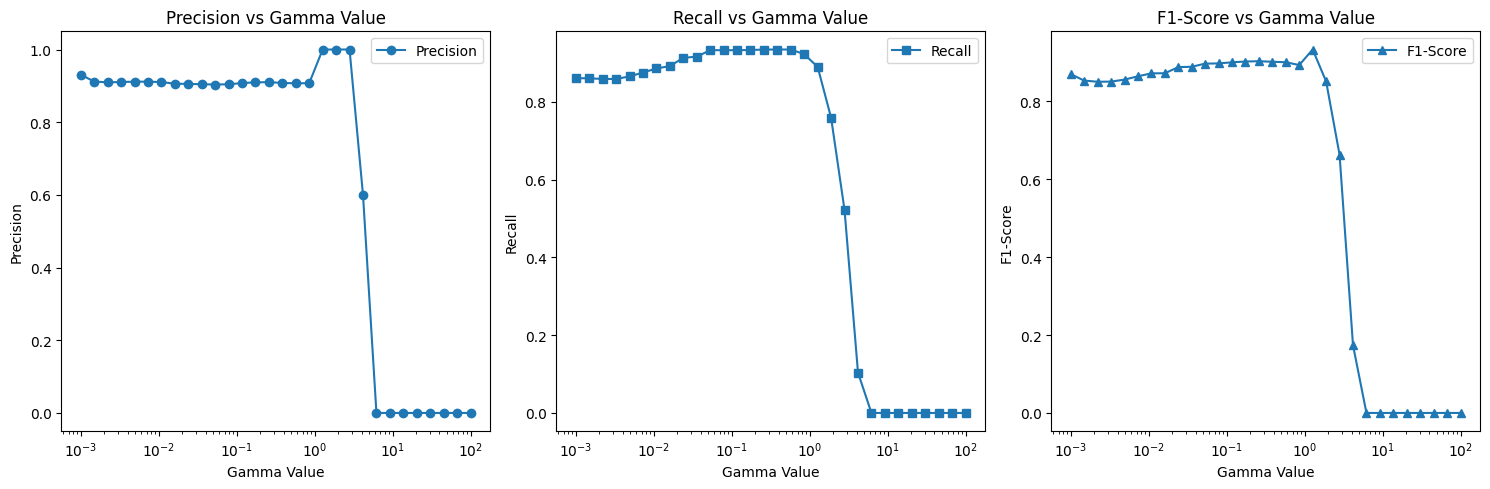

Max precision score: 1.0
Max recall score: 0.9346938775510203
Max f1 score: 0.932882077169884


In [16]:
# fine-tune other hyper-parameters supported by sklearn’s implementation of SVM
# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameters

# INSERT CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# INSERT CODE HERE
gamma_values = np.logspace(-3, 2, 30)
scoring_metrics = ['precision', 'recall', 'f1']
metric_scores = {'precision': [], 'recall': [], 'f1-score': []}

for g in gamma_values:
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # create an SVM classifier with a linear kernel
    svm = SVC(gamma=g, kernel='rbf')

    # fit the model to the training data
    # scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='precision')
    cv_results = cross_validate(svm, X, Y, cv=5, scoring=scoring_metrics, return_train_score=False)

    # Make predictions on the test data
    y_pred = svm.fit(X_train, y_train).predict(X_test)

    # Compute precision, recall, and F1-score using the classification_report function
    report = classification_report(y_test, y_pred, output_dict = True)

    # Collect precision, recall, f1-score
    # scores = np.array([float(c) for c in report.split('\n')[3].split()[1:4]])
    # metric_scores.append(scores)

    # Collect average scores across folds
    metric_scores['precision'].append(np.mean(cv_results['test_precision']))
    metric_scores['recall'].append(np.mean(cv_results['test_recall']))
    metric_scores['f1-score'].append(np.mean(cv_results['test_f1']))


# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameter 'C'
# INSERT CODE HERE

# Create three separate plots for precision, recall, and F1-score
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(gamma_values, metric_scores['precision'], label='Precision', marker='o')
plt.xlabel('Gamma Value')
plt.ylabel('Precision')
plt.xscale('log')
plt.title('Precision vs Gamma Value')
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(gamma_values, metric_scores['recall'], label='Recall', marker='s')
plt.xlabel('Gamma Value')
plt.ylabel('Recall')
plt.xscale('log')
plt.title('Recall vs Gamma Value')
plt.legend()

# F1-Score
plt.subplot(1, 3, 3)
plt.plot(gamma_values, metric_scores['f1-score'], label='F1-Score', marker='^')
plt.xlabel('Gamma Value')
plt.ylabel('F1-Score')
plt.xscale('log')
plt.title('F1-Score vs Gamma Value')
plt.legend()

plt.tight_layout()
plt.show()

print("Max precision score: " + str(max(metric_scores['precision'])))
print("Max recall score: " + str(max(metric_scores['recall'])))
print("Max f1 score: " + str(max(metric_scores['f1-score'])))





Used a C-Value of 1 because it produced the best f1-score and recall. Gamma for the rbf kernel has the same relationship with precision, recall, and f1-score. Most interestingly it achieved a max precision score of 1.

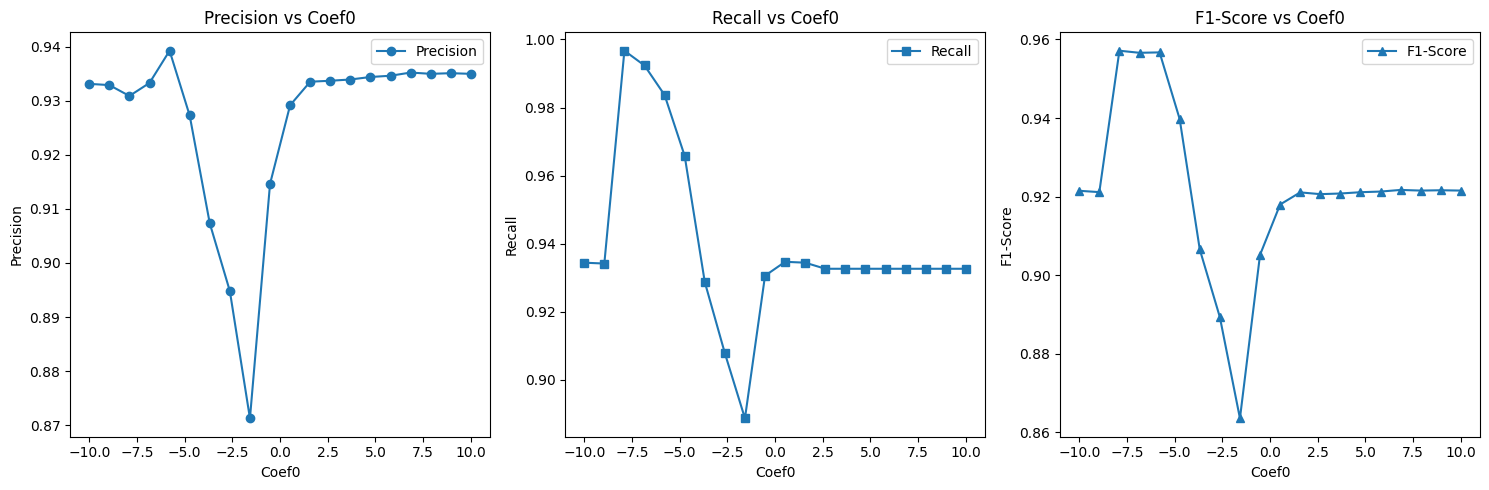

Max precision score: 0.9392963065624598
Max recall score: 0.9966810670628405
Max f1 score: 0.9571415539395834


In [23]:
# fine-tune other hyper-parameters supported by sklearn’s implementation of SVM
# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameters

# INSERT CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# INSERT CODE HERE
coefficients = np.linspace(-10,10,20)
scoring_metrics = ['precision', 'recall', 'f1']
metric_scores = {'precision': [], 'recall': [], 'f1-score': []}

for c in coefficients:
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # create an SVM classifier with a linear kernel
    svm = SVC(kernel='poly', coef0=c)

    # fit the model to the training data
    # scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='precision')
    cv_results = cross_validate(svm, X, Y, cv=5, scoring=scoring_metrics, return_train_score=False)

    # Make predictions on the test data
    y_pred = svm.fit(X_train, y_train).predict(X_test)

    # Compute precision, recall, and F1-score using the classification_report function
    report = classification_report(y_test, y_pred, output_dict = True)

    # Collect precision, recall, f1-score
    # scores = np.array([float(c) for c in report.split('\n')[3].split()[1:4]])
    # metric_scores.append(scores)

    # Collect average scores across folds
    metric_scores['precision'].append(np.mean(cv_results['test_precision']))
    metric_scores['recall'].append(np.mean(cv_results['test_recall']))
    metric_scores['f1-score'].append(np.mean(cv_results['test_f1']))


# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameter 'C'
# INSERT CODE HERE

# Create three separate plots for precision, recall, and F1-score
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(coefficients, metric_scores['precision'], label='Precision', marker='o')
plt.xlabel('Coef0')
plt.ylabel('Precision')
plt.title('Precision vs Coef0')
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(coefficients, metric_scores['recall'], label='Recall', marker='s')
plt.xlabel('Coef0')
plt.ylabel('Recall')
plt.title('Recall vs Coef0')
plt.legend()

# F1-Score
plt.subplot(1, 3, 3)
plt.plot(coefficients, metric_scores['f1-score'], label='F1-Score', marker='^')
plt.xlabel('Coef0')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Coef0')
plt.legend()

plt.tight_layout()
plt.show()

print("Max precision score: " + str(max(metric_scores['precision'])))
print("Max recall score: " + str(max(metric_scores['recall'])))
print("Max f1 score: " + str(max(metric_scores['f1-score'])))





For a Polynomial Kernel of degree 3 it seems that the Coef0 parameter yields a very high precision, recall, and f1-score for Coef0 values in the range (-7.5,5.0). These are the most consistently high scores for a model we have tuned so far.  



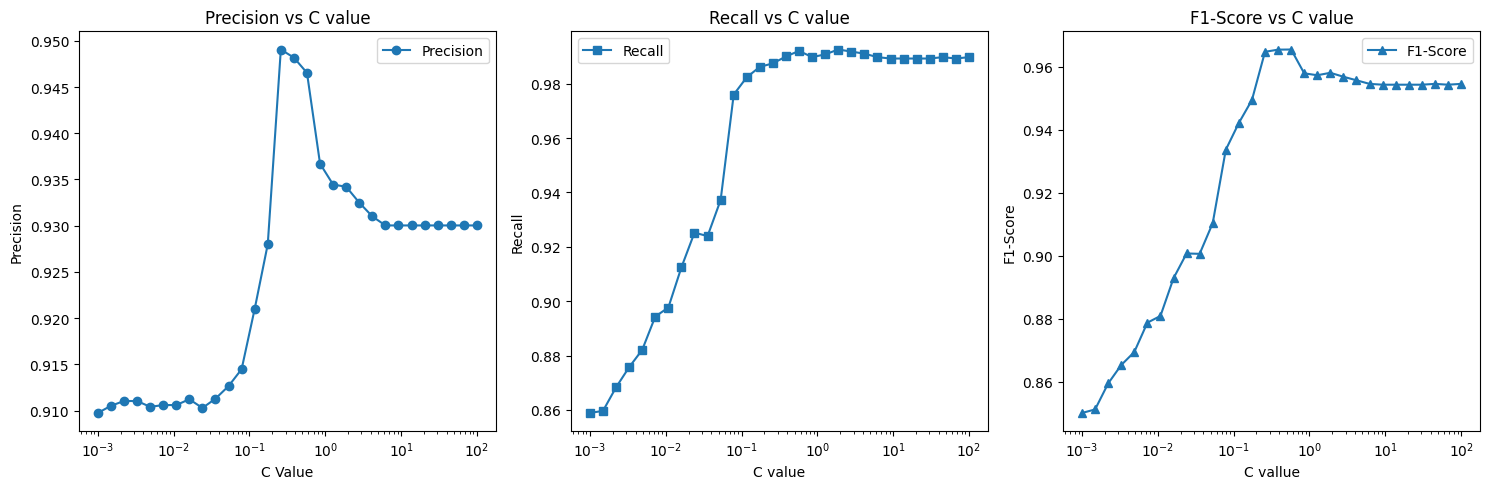

Max precision score: 0.9490631590126378
Max recall score: 0.9925951989991398
Max f1 score: 0.9655411000364683


In [24]:
# fine-tune other hyper-parameters supported by sklearn’s implementation of SVM
# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameters

# INSERT CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# INSERT CODE HERE
C_values = np.logspace(-3, 2, 30)
scoring_metrics = ['precision', 'recall', 'f1']
metric_scores = {'precision': [], 'recall': [], 'f1-score': []}

for c in C_values:
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # create an SVM classifier with a linear kernel
    svm = SVC(kernel='poly', C=c, coef0 = -6)

    # fit the model to the training data
    # scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='precision')
    cv_results = cross_validate(svm, X, Y, cv=5, scoring=scoring_metrics, return_train_score=False)

    # Make predictions on the test data
    y_pred = svm.fit(X_train, y_train).predict(X_test)

    # Compute precision, recall, and F1-score using the classification_report function
    report = classification_report(y_test, y_pred, output_dict = True)

    # Collect precision, recall, f1-score
    # scores = np.array([float(c) for c in report.split('\n')[3].split()[1:4]])
    # metric_scores.append(scores)

    # Collect average scores across folds
    metric_scores['precision'].append(np.mean(cv_results['test_precision']))
    metric_scores['recall'].append(np.mean(cv_results['test_recall']))
    metric_scores['f1-score'].append(np.mean(cv_results['test_f1']))


# Plot the 'precision', 'recall', 'f1-score' values for different choices of the parameter 'C'
# INSERT CODE HERE

# Create three separate plots for precision, recall, and F1-score
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(C_values, metric_scores['precision'], label='Precision', marker='o')
plt.xlabel('C Value')
plt.ylabel('Precision')
plt.xscale('log')
plt.title('Precision vs C value')
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(C_values, metric_scores['recall'], label='Recall', marker='s')
plt.xlabel('C value')
plt.ylabel('Recall')
plt.xscale('log')
plt.title('Recall vs C value')
plt.legend()

# F1-Score
plt.subplot(1, 3, 3)
plt.plot(C_values, metric_scores['f1-score'], label='F1-Score', marker='^')
plt.xlabel('C vallue')
plt.ylabel('F1-Score')
plt.xscale('log')
plt.title('F1-Score vs C value')
plt.legend()

plt.tight_layout()
plt.show()

print("Max precision score: " + str(max(metric_scores['precision'])))
print("Max recall score: " + str(max(metric_scores['recall'])))
print("Max f1 score: " + str(max(metric_scores['f1-score'])))





Building on the tuning of Coef0 we are able to tune the C_value to build a slightly improved SVM. The ideal C_value seems to be of a magnitude below 10e0 but greater than 10e-1. This model more consistently outperforms the logistic regressor because we achieve the highest scores for each metric at the same values for each parameter.